<h1> Trying to re-implement the given article, beside this trying out some machine learning classification algorithm </h1>
https://realpython.com/python-keras-text-classification/

In [ ]:
# Mounting the drive for data
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# Importing the required libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

<h1><strong> About data </strong></h1>
<p>
Let’s take a look at what data we have, Sentiment Labelled Sentences Data Set from the UCI Machine Learning Repository.
This data set includes labeled reviews from IMDb, Amazon, and Yelp, Each review is marked with a score of 0 for a negative sentiment or 1 for a positive sentiment.
</p>



In [ ]:
# Extract the folder into a data folder and go ahead and load the data with pandas 
filepath_dict = {'yelp' : '/content/drive/My Drive/Datasets/sentiment labelled sentences/yelp_labelled.txt',
                 'amazon' : '/content/drive/My Drive/Datasets/sentiment labelled sentences/amazon_cells_labelled.txt',
                 'imdb' : '/content/drive/My Drive/Datasets/sentiment labelled sentences/imdb_labelled.txt'}

df_list = []
for source, filepath in filepath_dict.items():
  df = pd.read_csv(filepath, names=['sentence', 'label'], sep = '\t')
  df['source'] = source
  df_list.append(df)

df = pd.concat(df_list)
print(df.iloc[0])

sentence    Wow... Loved this place.
label                              1
source                          yelp
Name: 0, dtype: object


In [ ]:
# Just to take a look at yelp reviews
df_yelp = df[df['source'] == 'yelp']

# Defining X and y
sentences = df_yelp['sentence'].values
y = df_yelp['label'].values

# Spilting the data (This is just for yelp reviews)
sentence_train, sentence_test, y_train, y_test = train_test_split(sentences, y, test_size = 0.20, random_state = 1)

Now we will try out one of the common way of NLP to covert text to vector.
CountVectorizer takes the approach of bago of words.


This works as follows :

1] Each word inside the document will be separated into tokens.

2] Assigning a weight to each token proportional to the frequency with which it shows up in the document and/or corpora.

3] Creating a document-term matrix with each row representing a document and each column addressing a token.

Example : 
doc = ['This is Count vectorizer']

       1st token = 'This'
       2nd token = 'is' and so on....
Then the number of times each token occures in a document is counted in case of CountVectorizer.

In [ ]:
# fiiting the data on yelp review
vectorizer = CountVectorizer()
vectorizer.fit(sentence_train)

X_train = vectorizer.transform(sentence_train)
X_test = vectorizer.transform(sentence_test)

X_train

<800x1777 sparse matrix of type '<class 'numpy.int64'>'
	with 7804 stored elements in Compressed Sparse Row format>

There are some words which are insignificant so, we need to remove it.
In order to do so, we use TF-IDF,

TF - Term Frequency :

     (How many times a term occures in a document)
     tf(i, j) = n(i, j) / E(n(i, j)
IDF - Inverse Document frequency : 

     How common a word is across all documents,
     IDF(w) = log ( N/DF(i) )




In [ ]:
# Using the TF-IDF vectorizer on the same data
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
vec.fit(sentence_train)

X_train_tfidf = vec.transform(sentence_train)
X_test_tfidf = vec.transform(sentence_test)

X_train_tfidf

<501x2429 sparse matrix of type '<class 'numpy.float64'>'
	with 7734 stored elements in Compressed Sparse Row format>

In [ ]:
# Using Logistic regression to begin with, great classification algorithm.
# https://towardsdatascience.com/understanding-logistic-regression-using-a-simple-example-163de52ea900 - a good resource for logistic regression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)

print(f"Accuracy : {score*100} %")

Accuracy : 84.0 %


As you can see, we got good accuracy on the yelp review with logistic regression

In [ ]:
# Now we are going to try logistic regression on IMDB and Amazon as well with CountVectorizer
for source in df['source'].unique():
  df_source = df[df['source'] == source]
  sentences = df_source['sentence'].values
  y = df_source['label'].values

  sentence_train, sentence_test, y_train, y_test = train_test_split(sentences, y, test_size = 0.33, random_state = 1)

  vect = CountVectorizer()
  vect.fit(sentence_train)

  X_train = vect.transform(sentence_train)
  X_test = vect.transform(sentence_test)

  classifier = LogisticRegression()
  classifier.fit(X_train, y_train)
  score = classifier.score(X_test, y_test)
  print(f"Accuracy for {source} data : {score :.4f} %")

Accuracy for yelp data : 0.8333 %
Accuracy for amazon data : 0.7727 %
Accuracy for imdb data : 0.7409 %


In [ ]:
# Now trying out logistic regression with TF-IDF
for source in df['source'].unique():
  df_source = df[df['source'] == source]
  sentences = df_source['sentence'].values
  y = df_source['label'].values

  sentence_train, sentence_test, y_train, y_test = train_test_split(sentences, y, test_size = 0.33, random_state = 1)

  vec = TfidfVectorizer()
  vec.fit(sentence_train)

  X_train_tfidf = vec.transform(sentence_train)
  X_test_tfidf = vec.transform(sentence_test)

  
  classifier.fit(X_train_tfidf, y_train)
  score = classifier.score(X_test_tfidf, y_test)
  print(f"Accuracy for {source} data : {score :.4f} %")

Accuracy for yelp data : 0.8242 %
Accuracy for amazon data : 0.7818 %
Accuracy for imdb data : 0.7692 %


As you can, there are not any significant changes.

In [ ]:
# Let's try out XGBoost classifier with CountVectorizer just to see, if there is any change....
# https://towardsdatascience.com/https-medium-com-vishalmorde-xgboost-algorithm-long-she-may-rein-edd9f99be63d
for source in df['source'].unique():
  df_source = df[df['source'] == source]
  sentences = df_source['sentence'].values
  y = df_source['label'].values

  sentence_train, sentence_test, y_train, y_test = train_test_split(sentences, y, test_size = 0.33, random_state = 1)

  vec = CountVectorizer()
  vec.fit(sentence_train)

  X_train = vec.transform(sentence_train)
  X_test = vec.transform(sentence_test)

  # I tried hyper tuning the parameters but model does not seemed to change in terms of accuracy and hence settled with these figures for my parameters..
  model3 = XGBClassifier(n_estimators = 200, max_depth = 3, min_child_weight = 1)
  model3.fit(X_train, y_train)

  score = model3.score(X_test, y_test)
  print(f"Accuracy : {score*100 : .2f} %")

Accuracy :  77.58 %
Accuracy :  71.52 %
Accuracy :  69.64 %


In [ ]:
# Trying out XGBoost with TF-IDF
for source in df['source'].unique():
  df_source = df[df['source'] == source]
  sentences = df_source['sentence'].values
  y = df_source['label'].values

  sentence_train, sentence_test, y_train, y_test = train_test_split(sentences, y, test_size = 0.33, random_state = 1)

  vect = TfidfVectorizer()
  vect.fit(sentence_train)

  X_train_tfidf = vect.transform(sentence_train)
  X_test_tfidf = vect.transform(sentence_test)

  model4 = XGBClassifier(n_estimators=200, max_depth = 3, min_child_weight=1)
  model4.fit(X_train_tfidf, y_train)

  score = model4.score(X_test_tfidf, y_test)
  print(f"Accuracy : {score*100 : .2f} %")

Accuracy :  75.76 %
Accuracy :  74.85 %
Accuracy :  65.99 %


In [ ]:
# Trying out RandomForest with CountVectorizer
from sklearn.ensemble import RandomForestClassifier
model4 = RandomForestClassifier()

for source in df['source'].unique():
  df_source = df[df['source'] == source]
  sentences = df_source['sentence'].values
  y = df_source['label'].values

  sentence_train, sentence_test, y_train, y_test = train_test_split(sentences, y, test_size = 0.33, random_state = 1)

  vec = CountVectorizer()
  vec.fit(sentence_train)

  X_train = vec.transform(sentence_train)
  X_test = vec.transform(sentence_test)

  
  model4.fit(X_train, y_train)

  score = model4.score(X_test, y_test)
  print(f"Accuracy : {score*100 : .2f} %")

Accuracy :  80.91 %
Accuracy :  76.06 %
Accuracy :  74.49 %


In [ ]:
# Trying out randomForest with TF-IDF..
from sklearn.ensemble import RandomForestClassifier
model4 = RandomForestClassifier()

for source in df['source'].unique():
  df_source = df[df['source'] == source]
  sentences = df_source['sentence'].values
  y = df_source['label'].values

  sentence_train, sentence_test, y_train, y_test = train_test_split(sentences, y, test_size = 0.33, random_state = 1)

  vect = TfidfVectorizer()
  vect.fit(sentence_train)

  X_train_tfidf = vect.transform(sentence_train)
  X_test_tfidf = vect.transform(sentence_test)

  
  model4.fit(X_train_tfidf, y_train)

  score = model4.score(X_test_tfidf, y_test)
  print(f"Accuracy : {score*100 : .2f} %")

Accuracy :  73.64 %
Accuracy :  75.15 %
Accuracy :  71.66 %


In [ ]:
from prettytable import PrettyTable
x = PrettyTable()

x.field_names = ['Classifiers', 'Yelp data', 'Amazon data', 'IMDB data']

x.add_row(['Logistic(CountVectorizer)', '83%', '77%', '74%'])
x.add_row(['Logistic(TF-IDF)', '82%', '78%', '76%'])

x.add_row(['XGBoost(CountVectorizer)', '77%', '71%', '69%'])
x.add_row(['XGBoost(TF-IDF)', '75%', '74%', '65%'])

x.add_row(['RandomForest(CountVectorizer)', '80%', '76%', '74%'])
x.add_row(['RandomForest(TF-IDF)', '73%', '75%', '71%'])

print(x)

+-------------------------------+-----------+-------------+-----------+
|          Classifiers          | Yelp data | Amazon data | IMDB data |
+-------------------------------+-----------+-------------+-----------+
|   Logistic(CountVectorizer)   |    83%    |     77%     |    74%    |
|        Logistic(TF-IDF)       |    82%    |     78%     |    76%    |
|    XGBoost(CountVectorizer)   |    77%    |     71%     |    69%    |
|        XGBoost(TF-IDF)        |    75%    |     74%     |    65%    |
| RandomForest(CountVectorizer) |    80%    |     76%     |    74%    |
|      RandomForest(TF-IDF)     |    73%    |     75%     |    71%    |
+-------------------------------+-----------+-------------+-----------+


<strong>As we saw , logistic regression performed well compared to other algorithm...</strong>

In [ ]:
# Trying some Deep learning magic, https://realpython.com/python-keras-text-classification/, Thanks to this article...
from keras.models import Sequential
from keras import layers

input_dim = X_train.shape[1]
model = Sequential()
model.add(layers.Dense(10, input_dim = input_dim, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                24300     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 24,311
Trainable params: 24,311
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, epochs = 50, verbose = False, validation_data = (X_test, y_test), batch_size = 10)

In [ ]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))


Training Accuracy: 0.9980
Testing Accuracy:  0.7611


In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

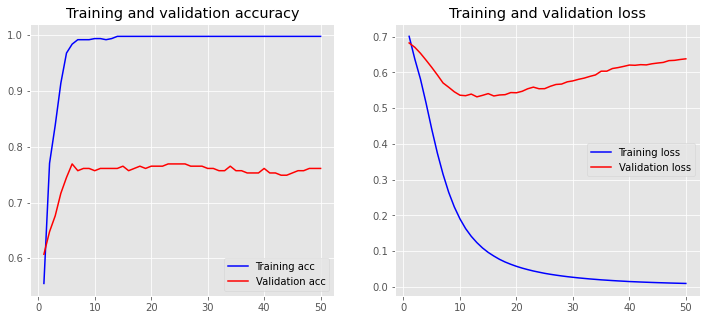

In [ ]:
plot_history(history)

In [ ]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words = 5000)

tokenizer.fit_on_texts(sentence_train)

X_train = tokenizer.texts_to_sequences(sentence_train)
X_test = tokenizer.texts_to_sequences(sentence_test)

vocab_size = len(tokenizer.word_index) + 1

print(sentence_train[2])
print(X_train[2])

Unfortunately, any virtue in this film's production work was lost on a regrettable script.  
[303, 129, 903, 10, 6, 537, 304, 98, 11, 538, 26, 3, 904, 91]


In [ ]:
from keras.preprocessing.sequence import pad_sequences

maxlen = 100

X_train = pad_sequences(X_train, padding = 'post', maxlen = maxlen)
X_test = pad_sequences(X_test, padding = 'post', maxlen = maxlen)

print(X_train[2, :])

[303 129 903  10   6 537 304  98  11 538  26   3 904  91   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]


In [ ]:
embedding_dim = 50
model1 = Sequential()
model1.add(layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim,
                            input_length = maxlen))
model1.add(layers.Flatten())
model1.add(layers.Dense(10, activation='relu'))
model1.add(layers.Dense(1, activation='sigmoid'))
model1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 50)           124750    
_________________________________________________________________
flatten_1 (Flatten)          (None, 5000)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                50010     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 11        
Total params: 174,771
Trainable params: 174,771
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Training Accuracy: 1.0000
Testing Accuracy:  0.7166


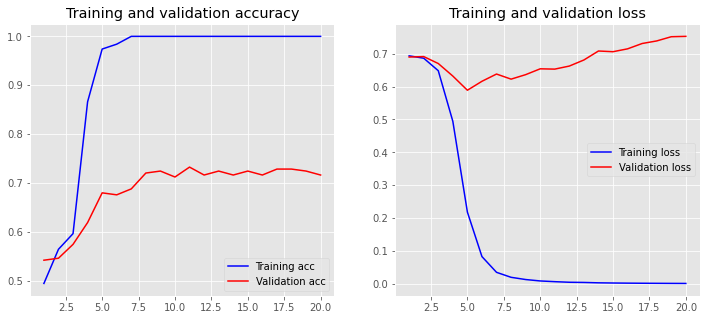

In [ ]:
history = model1.fit(X_train, y_train,
                    epochs=20,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model1.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model1.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [ ]:
embedding = 100

model2 = Sequential()

model2.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))

model2.add(layers.Conv1D(128, 5, activation='relu'))
model2.add(layers.GlobalMaxPooling1D())
model2.add(layers.Dense(10, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 50)           124750    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 96, 128)           32128     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 11        
Total params: 158,179
Trainable params: 158,179
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Training Accuracy: 1.0000
Testing Accuracy:  0.7530


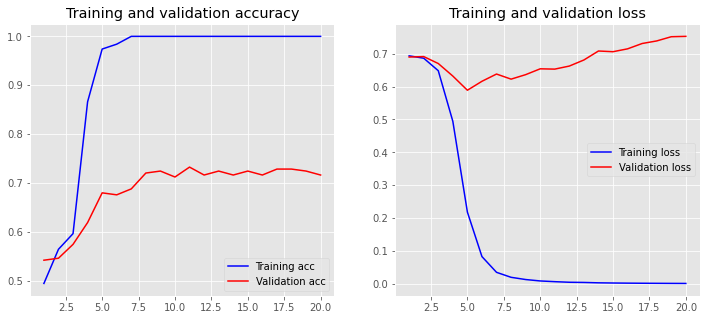

In [ ]:
history2 = model2.fit(X_train, y_train,
                    epochs=10,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model2.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model2.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [ ]:
def create_model(num_filters, kernel_size, vocab_size, embedding_dim, maxlen):
    model = Sequential()
    model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
    model.add(layers.Conv1D(num_filters, kernel_size, activation='relu'))
    model.add(layers.GlobalMaxPooling1D())
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [ ]:
param_grid = dict(num_filters=[32, 64, 128],
                  kernel_size=[3, 5, 7],
                  vocab_size=[5000], 
                  embedding_dim=[50],
                  maxlen=[100])

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV

# Main settings
epochs = 20
embedding_dim = 50
maxlen = 100
output_file = '/content/drive/My Drive/Datasets/sentiment labelled sentences/output.txt'

# Run grid search for each source (yelp, amazon, imdb)
for source, frame in df.groupby('source'):
    print('Running grid search for data set :', source)
    sentences = df['sentence'].values
    y = df['label'].values

      # Train-test split
    sentences_train, sentences_test, y_train, y_test = train_test_split(
        sentences, y, test_size=0.25, random_state=1000)

    # Tokenize words
    tokenizer = Tokenizer(num_words=5000)
    tokenizer.fit_on_texts(sentences_train)
    X_train = tokenizer.texts_to_sequences(sentences_train)
    X_test = tokenizer.texts_to_sequences(sentences_test)

    # Adding 1 because of reserved 0 index
    vocab_size = len(tokenizer.word_index) + 1

    # Pad sequences with zeros
    X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
    X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

    # Parameter grid for grid search
    param_grid = dict(num_filters=[32, 64, 128],
                      kernel_size=[3, 5, 7],
                      vocab_size=[vocab_size],
                      embedding_dim=[embedding_dim],
                      maxlen=[maxlen])
    model = KerasClassifier(build_fn=create_model,
                            epochs=epochs, batch_size=10,
                            verbose=False)
    grid = RandomizedSearchCV(estimator=model, param_distributions=param_grid,
                              cv=4, verbose=1, n_iter=5)
    grid_result = grid.fit(X_train, y_train)

    # Evaluate testing set
    test_accuracy = grid.score(X_test, y_test)

    # Save and evaluate results
    prompt = input(f'finished {source}; write to file and proceed? [y/n]')
    if prompt.lower() not in {'y', 'true', 'yes'}:
        break
    with open(output_file, 'a') as f:
        s = ('Running {} data set\nBest Accuracy : '
             '{:.4f}\n{}\nTest Accuracy : {:.4f}\n\n')
        output_string = s.format(
            source,
            grid_result.best_score_,
            grid_result.best_params_,
            test_accuracy)
        print(output_string)
        f.write(output_string)

Running grid search for data set : amazon
Fitting 4 folds for each of 5 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  7.1min finished


finished amazon; write to file and proceed? [y/n]y
Running amazon data set
Best Accuracy : 0.8171
{'vocab_size': 4603, 'num_filters': 32, 'maxlen': 100, 'kernel_size': 5, 'embedding_dim': 50}
Test Accuracy : 0.8399


Running grid search for data set : imdb
Fitting 4 folds for each of 5 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  8.1min finished


finished imdb; write to file and proceed? [y/n]y
Running imdb data set
Best Accuracy : 0.8161
{'vocab_size': 4603, 'num_filters': 32, 'maxlen': 100, 'kernel_size': 3, 'embedding_dim': 50}
Test Accuracy : 0.8384


Running grid search for data set : yelp
Fitting 4 folds for each of 5 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  8.3min finished


finished yelp; write to file and proceed? [y/n]y
Running yelp data set
Best Accuracy : 0.8200
{'vocab_size': 4603, 'num_filters': 128, 'maxlen': 100, 'kernel_size': 5, 'embedding_dim': 50}
Test Accuracy : 0.8413


